## Perceptrons

*(Credit: Leon Derczynski, IT University of Copenhagen)*

Let's build a little perceptron! It'll be on its own, which means it can only really do linearly separable problems. But that's OK; it'll try as hard as it can.

First, we'll set our version of Python so other coders (and shell interpreters) can see what we're doing, and import two handy things: a random numbers module; and some extensions that help with many different kinds of numerical math. You might even say mathS, in fact. Together they're called numpy, pronounced Numb Pie. We will also add a module for plotting our results.

In [1]:
#!/usr/bin/env python3
from random import choice 
from numpy import array, dot, random
import matplotlib.pyplot as plt

Next, we'll define our training data. The format is thus, for each example:
* an array containng the two input features, often together called *X*, followed with a bias value, which'll be 1
* the output label, *y*

(Some other ways of doing this hide the bias away. But then we might forget that there's a bias value there at all, which would be less instructive.)

In our first case, we will model a boolean function, OR. In the OR function, if either one of the two inputs is 1 (true), then the output will also be 1 (true):

In [2]:
training_data = [ 
	(array([0,0,1]), 0), 
	(array([0,1,1]), 0), 
	(array([1,0,1]), 0), 
	(array([1,1,1]), 1),
	]

Next, we'll set up our activation function. The function itself is a simple one line function, otherwise known as a lambda function:

In [3]:
unit_step = lambda x: 0 if x < 0 else 1

Finally come the hyperparameters, and a little list where we'll keep track of how well training has gone. Oh, and while we're at it, let's initialise the weights too.

In [4]:
n = 100              # the number of training iterations, which we call epochs
eta = 0.8            # the learning rate - scales how much we update on each iteration
errors = []          # an array to store the errors in
w = random.rand(3)   # an array of initial weights

So next, we have the training process. For each epoch, we randomly select a training example. With that example,we work out the [dot product](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of the features and our current weights. This gives us the activation potential - how much our neuron is trying to fire.

Next, we put this through our activation function to see what our neuron really does, and compare that to what the answer should be, for this example. The difference is our error; how far wrong were we? We'll store that error so we can view them later.

In the mean time, we'll update our weights, so they become closer to where they should have been. i.e. we try to reduce the error to zero. The learning rate scales how big that update is. Here's the code.

In [5]:
for i in range(n): 
	x, expected = choice(training_data) 
	result = dot(w, x) 
	error = expected - unit_step(result) 
	errors.append(error) 
	w += eta * error * x

So, how did we do? Let's go through the examples in the training set, and fire our weighted perceptron - using the learning weights, $w$ - for each eaxmple.

In [6]:
for x, _ in training_data:
	result = dot(x, w)
	print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -1.004147967725323 -> 0
[0 1]: -0.06061063727639937 -> 0
[1 0]: -0.5946737571253962 -> 0
[1 1]: 0.34886357332352746 -> 1


How does it look? Did we nail it?

Finally, let's print a graph of those errors, to see how the process went.

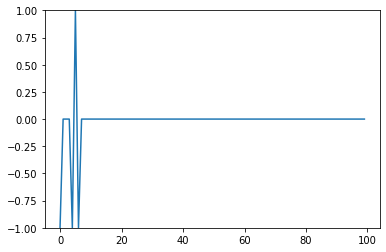

In [7]:
plt.ylim([-1,1]) 
plt.plot(errors)

### Exercises for you to try

Try adapting the training data array to model these functions, running again for each one:
* AND  - output is 1 if and only if both inputs are 1
* NAND -  output is 1 if and only if both inputs are 0 (not and)
* XOR  -  ouput is 1 if only one of the inputs is 1, not if both or none are 1 (exclusive or)

What did you find? Did they all work? If not, why not? 